# 线性回归

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split


%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['Kaiti']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
boston = load_boston()

In [3]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
# data['PRICE'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
x = boston.data
y = boston.target

In [5]:
## 查看数据相关性
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


<AxesSubplot:>

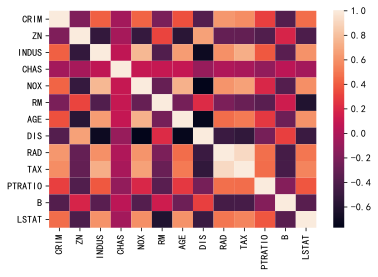

In [6]:
## 热力图
import seaborn as sns

sns.heatmap(data.corr())

## 线性回归模型

In [7]:
## 划分数据集

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=100)


In [8]:
## 标准化

from sklearn.preprocessing import MinMaxScaler   # 0-1标准化缩放
from sklearn.preprocessing import StandardScaler  # 标准化缩放

In [9]:
std = StandardScaler().fit(x_train)
# 实例化和导入数据：std, xtrain (mean, std)

In [10]:
# 在fit的基础上，进行标准化，降维，归一化等操作
x_train_ = std.transform(x_train)
x_test_ = std.transform(x_test)

In [11]:
# 导入相关包

from sklearn.linear_model import LinearRegression

# 训练模型
lr = LinearRegression().fit(x_train_, y_train)

In [12]:
lr.coef_   # 参数【a1,a2,a3,a4,...,am】m个特征

array([-0.60033443,  0.91337983, -0.04123957,  0.67387317, -1.52448856,
        2.76096722, -0.34091223, -2.81997448,  2.45481024, -2.36183297,
       -1.94244355,  0.95375187, -3.22519325])

In [13]:
lr.intercept_    # 截距项 a_0

22.602259887005644

# Lasso回归

In [14]:
from sklearn.linear_model import Lasso

In [16]:
x_train_.shape    # 标准化过后的354个样本，每个样本13个特征

(354, 13)

In [17]:
y_train.shape   # 354个样本的标签

(354,)

In [18]:
# 训练
Lr_lasso = Lasso().fit(x_train_, y_train)
#     alpha=1.0,    # 正则强度
#     max_iter=1000,   # 最大迭代次数
#     tol=0.0001,      # 收敛域的精度  

In [19]:
# 参数值
Lr_lasso.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        2.70681327, -0.        , -0.        , -0.        , -0.13886139,
       -1.30395927,  0.27355853, -3.18057752])

In [22]:
Lr_lasso.score(x_test_, y_test)

0.611789619767494

# 岭回归 Ridge

In [23]:
from sklearn.linear_model import Ridge

In [24]:
Lr_ridge = Ridge().fit(x_train_, y_train)

In [25]:
Lr_ridge.coef_

array([-0.59194597,  0.89613752, -0.07567943,  0.67945725, -1.49640023,
        2.76923574, -0.34436004, -2.79042047,  2.35332054, -2.26047922,
       -1.93281292,  0.95248396, -3.2089637 ])

In [28]:
(Lr_ridge.score(x_train_, y_train), Lr_ridge.score(x_test_, y_test))

(0.7528670307564558, 0.7051446510621604)

# 多项式回归

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
poly = PolynomialFeatures(degree=2).fit(x_train_)    # degree=2：两次多项式

In [33]:
x_train_poly = poly.transform(x_train_)
x_test_poly = poly.transform(x_test_)

In [32]:
x_train_poly.shape

(354, 105)

In [34]:
# 新的105个特征的名字
poly.get_feature_names(input_features=boston.feature_names)

['1',
 'CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'CRIM^2',
 'CRIM ZN',
 'CRIM INDUS',
 'CRIM CHAS',
 'CRIM NOX',
 'CRIM RM',
 'CRIM AGE',
 'CRIM DIS',
 'CRIM RAD',
 'CRIM TAX',
 'CRIM PTRATIO',
 'CRIM B',
 'CRIM LSTAT',
 'ZN^2',
 'ZN INDUS',
 'ZN CHAS',
 'ZN NOX',
 'ZN RM',
 'ZN AGE',
 'ZN DIS',
 'ZN RAD',
 'ZN TAX',
 'ZN PTRATIO',
 'ZN B',
 'ZN LSTAT',
 'INDUS^2',
 'INDUS CHAS',
 'INDUS NOX',
 'INDUS RM',
 'INDUS AGE',
 'INDUS DIS',
 'INDUS RAD',
 'INDUS TAX',
 'INDUS PTRATIO',
 'INDUS B',
 'INDUS LSTAT',
 'CHAS^2',
 'CHAS NOX',
 'CHAS RM',
 'CHAS AGE',
 'CHAS DIS',
 'CHAS RAD',
 'CHAS TAX',
 'CHAS PTRATIO',
 'CHAS B',
 'CHAS LSTAT',
 'NOX^2',
 'NOX RM',
 'NOX AGE',
 'NOX DIS',
 'NOX RAD',
 'NOX TAX',
 'NOX PTRATIO',
 'NOX B',
 'NOX LSTAT',
 'RM^2',
 'RM AGE',
 'RM DIS',
 'RM RAD',
 'RM TAX',
 'RM PTRATIO',
 'RM B',
 'RM LSTAT',
 'AGE^2',
 'AGE DIS',
 'AGE RAD',
 'AGE TAX',
 'AGE PTRATIO',
 'AGE B',
 'AGE LSTAT',
 'DI

In [43]:
# 用三个回归看效果

Lr_line_plus = LinearRegression().fit(x_train_poly, y_train)

Lr_lasso_plus = Lasso().fit(x_train_poly, y_train)

Lr_ridge_plus = Ridge().fit(x_train_poly, y_train)

In [44]:
(Lr_line_plus.score(x_train_poly, y_train), Lr_line_plus.score(x_test_poly, y_test))

(0.9516825715138222, 0.7750507529197197)

In [45]:
(Lr_lasso_plus.score(x_train_poly, y_train), Lr_lasso_plus.score(x_test_poly, y_test))

(0.7908810370767878, 0.7170091088568334)

In [46]:
(Lr_ridge_plus.score(x_train_poly, y_train), Lr_ridge_plus.score(x_test_poly, y_test))

(0.9481865677628037, 0.8025022727155333)